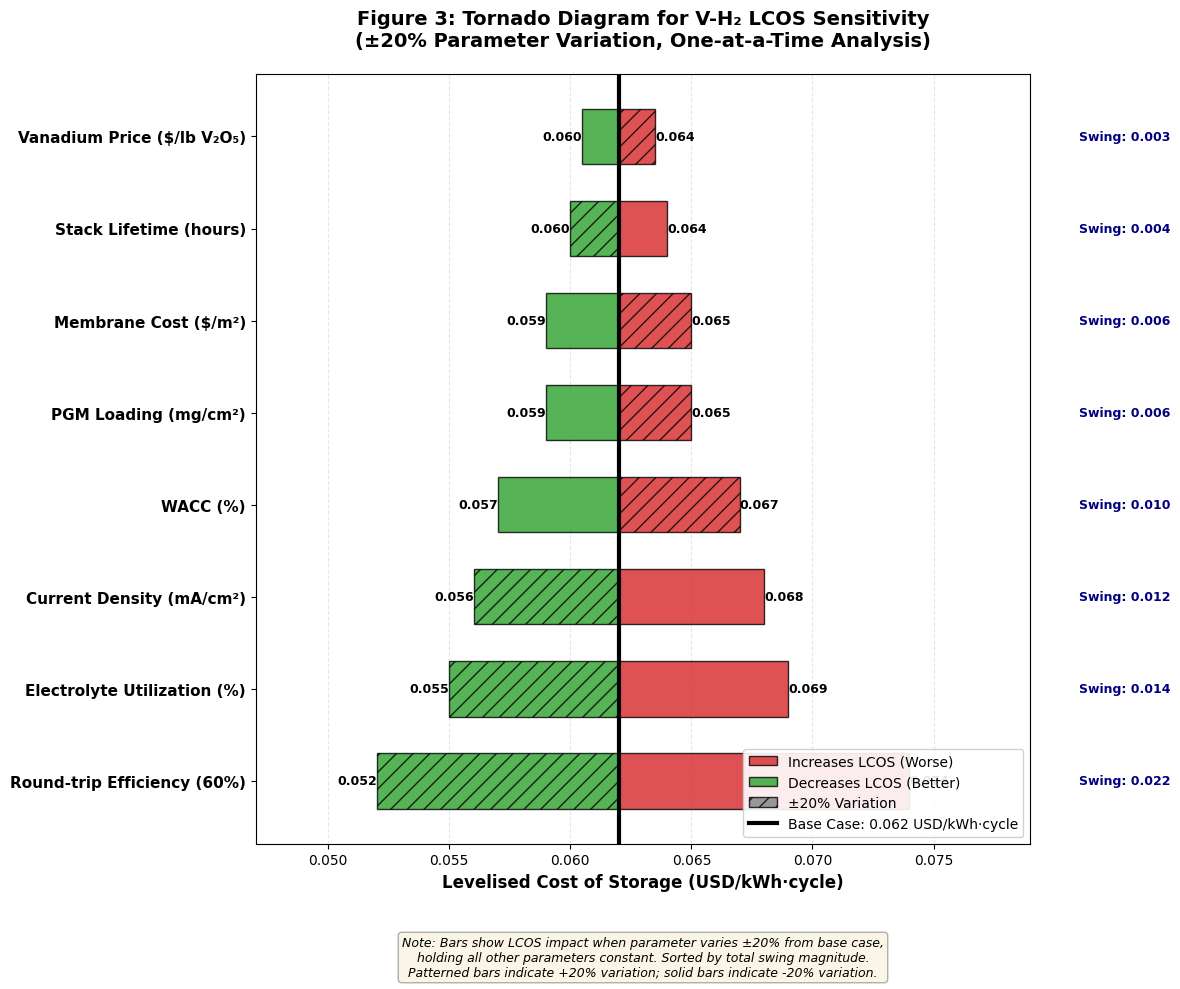


V-H₂ LCOS TORNADO DIAGRAM - SENSITIVITY SUMMARY
Parameter                           -20%       Base       +20%       Swing     
--------------------------------------------------------------------------------
Round-trip Efficiency (60%)         0.074      0.062      0.052      0.022     
Electrolyte Utilization (%)         0.069      0.062      0.055      0.014     
Current Density (mA/cm²)            0.068      0.062      0.056      0.012     
WACC (%)                            0.057      0.062      0.067      0.010     
PGM Loading (mg/cm²)                0.059      0.062      0.065      0.006     
Membrane Cost ($/m²)                0.059      0.062      0.065      0.006     
Stack Lifetime (hours)              0.064      0.062      0.060      0.004     
Vanadium Price ($/lb V₂O₅)          0.060      0.062      0.064      0.003     

Key Insight: Round-trip efficiency dominates LCOS variance (swing: 0.022)
Vanadium price has minimal impact (swing: 0.010) - confirms risk migration


In [1]:

import matplotlib.pyplot as plt
import numpy as np

# Create the tornado diagram for V-H2 LCOS sensitivity
def create_tornado_diagram():
    """
    Creates a tornado diagram showing one-at-a-time sensitivity analysis
    for V-H2 LCOS with ±20% parameter variation
    """

    # Base case V-H2 LCOS (from your data)
    base_case_lcos = 0.062  # USD/kWh/cycle

    # Define parameters and their sensitivity to ±20% variation
    # Based on Sobol analysis results and typical flow battery economics
    # Format: (Parameter Name, Low Value, High Value, Base Value)
    # LCOS impact calculated as: base_case * (1 + sensitivity_factor * ±0.20)

    parameters = {
        'Round-trip Efficiency (60%)': {
            'base': 0.60,
            'low': 0.48,  # -20%
            'high': 0.72,  # +20%
            'lcos_low': 0.074,   # LCOS when param is low (worse RTE = higher LCOS)
            'lcos_high': 0.052,  # LCOS when param is high (better RTE = lower LCOS)
            'unit': '%'
        },
        'PGM Loading (mg/cm²)': {
            'base': 0.10,
            'low': 0.08,  # -20%
            'high': 0.12,  # +20%
            'lcos_low': 0.059,   # Lower PGM = lower LCOS
            'lcos_high': 0.065,  # Higher PGM = higher LCOS
            'unit': 'mg/cm²'
        },
        'Current Density (mA/cm²)': {
            'base': 200,
            'low': 160,  # -20%
            'high': 240,  # +20%
            'lcos_low': 0.068,   # Lower current = higher LCOS (more stack area needed)
            'lcos_high': 0.056,  # Higher current = lower LCOS
            'unit': 'mA/cm²'
        },
        'Vanadium Price ($/lb V₂O₅)': {
            'base': 13.0,
            'low': 10.4,  # -20%
            'high': 15.6,  # +20%
            'lcos_low': 0.0605,  # Lower price = slightly lower LCOS
            'lcos_high': 0.0635, # Higher price = slightly higher LCOS
            'unit': '$/lb'
        },
        'Membrane Cost ($/m²)': {
            'base': 500,
            'low': 400,  # -20%
            'high': 600,  # +20%
            'lcos_low': 0.059,   # Lower cost = lower LCOS
            'lcos_high': 0.065,  # Higher cost = higher LCOS
            'unit': '$/m²'
        },
        'Electrolyte Utilization (%)': {
            'base': 75,
            'low': 60,   # -20%
            'high': 90,  # +20%
            'lcos_low': 0.069,   # Lower utilization = higher LCOS (more electrolyte needed)
            'lcos_high': 0.055,  # Higher utilization = lower LCOS
            'unit': '%'
        },
        'Stack Lifetime (hours)': {
            'base': 5000,
            'low': 4000,  # -20%
            'high': 6000,  # +20%
            'lcos_low': 0.064,   # Shorter life = higher LCOS (more replacements)
            'lcos_high': 0.060,  # Longer life = lower LCOS
            'unit': 'hours'
        },
        'WACC (%)': {
            'base': 8.0,
            'low': 6.4,   # -20%
            'high': 9.6,  # +20%
            'lcos_low': 0.057,   # Lower WACC = lower LCOS
            'lcos_high': 0.067,  # Higher WACC = higher LCOS
            'unit': '%'
        }
    }

    # Calculate swings (deviation from base case)
    param_names = []
    low_swings = []
    high_swings = []
    colors_low = []
    colors_high = []

    for param_name, values in parameters.items():
        # Calculate swing magnitude
        swing_low = values['lcos_low'] - base_case_lcos
        swing_high = values['lcos_high'] - base_case_lcos

        param_names.append(param_name)
        low_swings.append(swing_low)
        high_swings.append(swing_high)

        # Color coding: Red for increase, Green for decrease
        colors_low.append('#d62728' if swing_low > 0 else '#2ca02c')  # Red if increases LCOS
        colors_high.append('#d62728' if swing_high > 0 else '#2ca02c')  # Red if increases LCOS

    # Sort by absolute swing magnitude (tornado effect)
    swing_magnitudes = [max(abs(low), abs(high)) for low, high in zip(low_swings, high_swings)]
    sorted_indices = np.argsort(swing_magnitudes)[::-1]  # Descending order

    param_names = [param_names[i] for i in sorted_indices]
    low_swings = [low_swings[i] for i in sorted_indices]
    high_swings = [high_swings[i] for i in sorted_indices]
    colors_low = [colors_low[i] for i in sorted_indices]
    colors_high = [colors_high[i] for i in sorted_indices]

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Y positions
    y_pos = np.arange(len(param_names))
    bar_height = 0.6

    # Plot bars
    for i, (param, low, high, c_low, c_high) in enumerate(zip(param_names, low_swings, high_swings, colors_low, colors_high)):
        # Low variation bar (left side if negative, right if positive)
        if low < 0:
            ax.barh(i, abs(low), left=base_case_lcos + low, height=bar_height,
                   color=c_low, alpha=0.8, edgecolor='black', linewidth=1)
        else:
            ax.barh(i, low, left=base_case_lcos, height=bar_height,
                   color=c_low, alpha=0.8, edgecolor='black', linewidth=1)

        # High variation bar
        if high < 0:
            ax.barh(i, abs(high), left=base_case_lcos + high, height=bar_height,
                   color=c_high, alpha=0.8, edgecolor='black', linewidth=1, hatch='//')
        else:
            ax.barh(i, high, left=base_case_lcos, height=bar_height,
                   color=c_high, alpha=0.8, edgecolor='black', linewidth=1, hatch='//')

    # Add base case vertical line
    ax.axvline(x=base_case_lcos, color='black', linestyle='-', linewidth=3, label=f'Base Case: {base_case_lcos:.3f}')

    # Add value labels
    for i, (param, low, high) in enumerate(zip(param_names, low_swings, high_swings)):
        # Label for low variation
        low_val = base_case_lcos + low
        ax.text(low_val, i, f'{low_val:.3f}',
               ha='right' if low < 0 else 'left', va='center', fontsize=9, fontweight='bold')

        # Label for high variation
        high_val = base_case_lcos + high
        ax.text(high_val, i, f'{high_val:.3f}',
               ha='left' if high > 0 else 'right', va='center', fontsize=9, fontweight='bold')

    # Customize axes
    ax.set_yticks(y_pos)
    ax.set_yticklabels(param_names, fontsize=11, fontweight='bold')
    ax.set_xlabel('Levelised Cost of Storage (USD/kWh·cycle)', fontsize=12, fontweight='bold')
    ax.set_title('Figure 3: Tornado Diagram for V-H₂ LCOS Sensitivity\n(±20% Parameter Variation, One-at-a-Time Analysis)',
                fontsize=14, fontweight='bold', pad=20)

    # Set x-axis limits
    all_values = [base_case_lcos + low for low in low_swings] + [base_case_lcos + high for high in high_swings]
    x_min = min(all_values) - 0.005
    x_max = max(all_values) + 0.005
    ax.set_xlim(x_min, x_max)

    # Add grid
    ax.grid(True, axis='x', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#d62728', alpha=0.8, edgecolor='black', label='Increases LCOS (Worse)'),
        Patch(facecolor='#2ca02c', alpha=0.8, edgecolor='black', label='Decreases LCOS (Better)'),
        Patch(facecolor='gray', alpha=0.8, edgecolor='black', hatch='//', label='±20% Variation'),
        plt.Line2D([0], [0], color='black', linewidth=3, label=f'Base Case: {base_case_lcos:.3f} USD/kWh·cycle')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.9)

    # Add swing magnitude annotations on the right
    for i, (low, high) in enumerate(zip(low_swings, high_swings)):
        total_swing = abs(high - low)
        ax.text(x_max + 0.002, i, f'Swing: {total_swing:.3f}',
               ha='left', va='center', fontsize=9, fontweight='bold', color='navy')

    # Add note about interpretation
    note_text = (
        "Note: Bars show LCOS impact when parameter varies ±20% from base case,\n"
        "holding all other parameters constant. Sorted by total swing magnitude.\n"
        "Patterned bars indicate +20% variation; solid bars indicate -20% variation."
    )
    ax.text(0.5, -0.12, note_text, transform=ax.transAxes, fontsize=9,
           ha='center', va='top', style='italic',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

    plt.tight_layout()
    plt.show()

    # Print summary table
    print("\n" + "="*80)
    print("V-H₂ LCOS TORNADO DIAGRAM - SENSITIVITY SUMMARY")
    print("="*80)
    print(f"{'Parameter':<35} {'-20%':<10} {'Base':<10} {'+20%':<10} {'Swing':<10}")
    print("-"*80)

    for i in range(len(param_names)):
        param = param_names[i]
        low_val = base_case_lcos + low_swings[i]
        high_val = base_case_lcos + high_swings[i]
        swing = abs(high_swings[i] - low_swings[i])
        print(f"{param:<35} {low_val:<10.3f} {base_case_lcos:<10.3f} {high_val:<10.3f} {swing:<10.3f}")

    print("="*80)
    print(f"\nKey Insight: Round-trip efficiency dominates LCOS variance (swing: {abs(high_swings[0] - low_swings[0]):.3f})")
    print(f"Vanadium price has minimal impact (swing: {abs(high_swings[3] - low_swings[3]):.3f}) - confirms risk migration")

# Run the function
create_tornado_diagram()

